<a href="https://colab.research.google.com/github/doritos0812/Software_LAB_Class/blob/main/2015104013_%EA%B9%80%ED%98%95%EB%AF%BC_Ex_Baseball_statistics_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ex) Baseball statistics
$$
\newcommand{\eg}{{\it e.g.}}
\newcommand{\ie}{{\it i.e.}}
\newcommand{\argmin}{\operatornamewithlimits{argmin}}
\newcommand{\mc}{\mathcal}
\newcommand{\mb}{\mathbb}
\newcommand{\mf}{\mathbf}
\newcommand{\minimize}{{\text{minimize}}}
\newcommand{\diag}{{\text{diag}}}
\newcommand{\cond}{{\text{cond}}}
\newcommand{\rank}{{\text{rank }}}
\newcommand{\range}{{\mathcal{R}}}
\newcommand{\null}{{\mathcal{N}}}
\newcommand{\tr}{{\text{trace}}}
\newcommand{\dom}{{\text{dom}}}
\newcommand{\dist}{{\text{dist}}}
\newcommand{\R}{\mathbf{R}}
\newcommand{\SM}{\mathbf{S}}
\newcommand{\ball}{\mathcal{B}}
\newcommand{\bmat}[1]{\begin{bmatrix}#1\end{bmatrix}}
$$

__<div style="text-align: right"> EE370: Software lab, Kyung Hee University. </div>__
_<div style="text-align: right"> Jong-Han Kim (jonghank@khu.ac.kr) </div>_
_<div style="text-align: right"> Jun-Hyon Cho (050973@khu.ac.kr) </div>_

Throughout the baseball history, the management guys of ball-clubs have tried to evaluate baseball players, and they created some statistics such as 'Average (타율)', 'Runs Batted In (RBI, 타점)', 'Earned Run Average (ERA, 평균자책점)' and so on. But these have some limitations in measuring the "real value" of the players, so some complicated mathematical stuffs came in and a new approach called 'SABERMETRICS' was introduced.


We will first download a dataset describing the starting pitchers' statistics from the MLB season 2018. For your information, these can be obtained from 
[fangraphs.com](https://www.fangraphs.com/leaders.aspx?pos=all&stats=sta&lg=all&qual=y&type=0&season=2018&month=0&season1=2018&ind=0&team=0&rost=0&age=0&filter=&players=0&startdate=2018-01-01&enddate=2018-12-31).

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('https://raw.githubusercontent.com/meongrang/aaaa/master/2018_MLB_Starters_Standard')
df

,Name,Team,W,L,ERA,G,GS,CG,ShO,SV,HLD,BS,IP,TBF,H,R,ER,HR,BB,IBB,HBP,WP,BK,SO,playerid
0,Jacob deGrom,Mets,10,9,1.70,32,32,1,0,0,0,0,217.0,835,152,48,41,10,46,3,5,2,0,269,10954
1,Blake Snell,Rays,21,5,1.89,31,31,0,0,0,0,0,180.2,700,112,41,38,16,64,2,1,13,0,221,13543
2,Trevor Bauer,Indians,12,6,2.26,27,27,0,0,0,0,0,171.1,703,132,51,43,9,57,2,9,12,0,219,12703
3,Aaron Nola,Phillies,17,6,2.37,33,33,0,0,0,0,0,212.1,831,149,57,56,17,58,3,7,4,1,224,16149
4,Justin Verlander,Astros,16,9,2.52,34,34,1,1,0,0,0,214.0,833,156,63,60,28,37,0,8,5,2,290,8700
5,Max Scherzer,Nationals,18,7,2.53,33,33,2,1,0,0,0,220.2,866,150,66,62,23,51,4,12,4,1,300,3137
6,Miles Mikolas,Cardinals,18,4,2.83,32,32,1,1,0,0,0,200.2,808,186,70,63,16,29,4,7,2,1,146,9803
7,Kyle Freeland,Rockies,17,7,2.85,33,33,0,0,0,0,0,202.1,844,182,64,64,17,70,2,6,2,0,173,16256
8,Mike Foltynewicz,Braves,13,10,2.85,31,31,2,1,0,0,0,183.0,744,130,65,58,17,68,3,6,7,2,202,10811
9,Gerrit Cole,Astros,15,5,2.88,32,32,1,1,0,0,0,200.1,799,143,68,64,19,64,0,7,9,0,276,13125


One of the most famous stats in sabermetrics is the 'Fielding Independent Pitching (FIP, 수비무관 평균자책점)'. In a ball game, earned runs are not only decided by the pitching skills, but also decided by a lot of other factors such as the size of the field and the fielding skills of position players. Hence, sabermetricians who deal with sabermetrics pay attention to the position-player-independent factors. For example, the strike-outs or the base-on-balls are independent of the performances of position players, but only a pitcher is involved. So the FIP can be represented by using these independent factors as follows.

<br>
$$
FIP = \frac{13HR+3(BB-IBB+HBP)-2SO}{IP} +3.20
$$

<br>
Here, IP, BB, IBB, HBP, HR and SO denote Inning Pitched, Base on Balls, Intentional Base on Balls, Hit By Pitch, HomeRuns, and StrikeOuts, respectively. 

**(Problem 1)** Calculate the FIP of the pitchers using the above formula, and append it as a new column on your dataframe. Display the results on a plot.

,Name,Team,W,L,ERA,G,GS,CG,ShO,SV,HLD,BS,IP,TBF,H,R,ER,HR,BB,IBB,HBP,WP,BK,SO,playerid,FIP
0,Jacob deGrom,Mets,10,9,1.70,32,32,1,0,0,0,0,217.0,835,152,48,41,10,46,3,5,2,0,269,10954,1.983410
1,Blake Snell,Rays,21,5,1.89,31,31,0,0,0,0,0,180.2,700,112,41,38,16,64,2,1,13,0,221,13543,2.950277
2,Trevor Bauer,Indians,12,6,2.26,27,27,0,0,0,0,0,171.1,703,132,51,43,9,57,2,9,12,0,219,12703,2.446055
3,Aaron Nola,Phillies,17,6,2.37,33,33,0,0,0,0,0,212.1,831,149,57,56,17,58,3,7,4,1,224,16149,3.006695
4,Justin Verlander,Astros,16,9,2.52,34,34,1,1,0,0,0,214.0,833,156,63,60,28,37,0,8,5,2,290,8700,2.821495
5,Max Scherzer,Nationals,18,7,2.53,33,33,2,1,0,0,0,220.2,866,150,66,62,23,51,4,12,4,1,300,3137,2.636876
6,Miles Mikolas,Cardinals,18,4,2.83,32,32,1,1,0,0,0,200.2,808,186,70,63,16,29,4,7,2,1,146,9803,3.259940
7,Kyle Freeland,Rockies,17,7,2.85,33,33,0,0,0,0,0,202.1,844,182,64,64,17,70,2,6,2,0,173,16256,3.679960
8,Mike Foltynewicz,Braves,13,10,2.85,31,31,2,1,0,0,0,183.0,744,130,65,58,17,68,3,6,7,2,202,10811,3.363934
9,Gerrit Cole,Astros,15,5,2.88,32,32,1,1,0,0,0,200.1,799,143,68,64,19,64,0,7,9,0,276,13125,2.740230


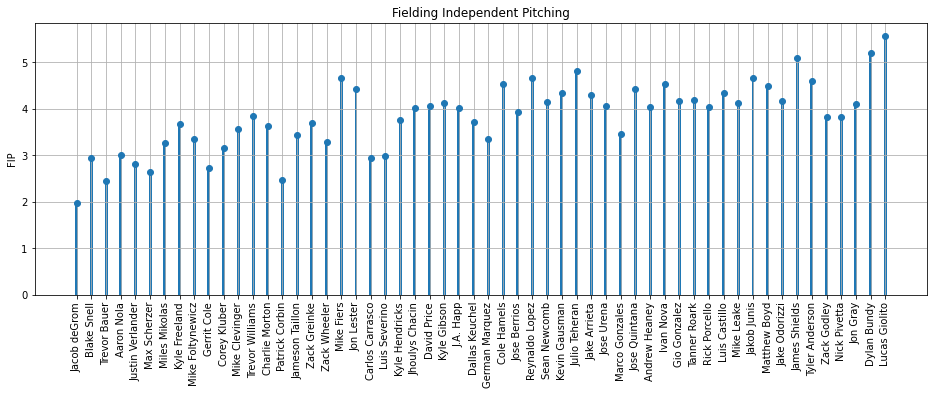

In [ ]:
# your code here
FIP=[]
FIP=((13*df['HR']+3*(df['BB']-df['IBB']+df['HBP'])-2*df['SO'])/df['IP'])+3.20
df['FIP'] = FIP
plt.figure(figsize=(16,5))
plt.bar(df['Name'], FIP, width=0.2)
plt.plot(df['Name'], FIP,'o')
plt.grid(True)
plt.xticks(df['Name'],rotation=90)
plt.ylabel("FIP")
plt.title("Fielding Independent Pitching")
df

<br>

**(Problem 2)** The MLB is divided into two leagues; the National League(NL) and the American League(AL). By running below cell, you can get the lists made of the NL and the AL teams.

In [ ]:
AL = ['Yankees', 'Rays', 'Red Sox', 'Blue Jays', 'Orioles', 'Twins', 'Indians', 'White Sox', 'Royals', 'Tigers', \
      'Astros', 'Athletics', 'Rangers', 'Angels', 'Mariners']
NL = ['Braves', 'Nationals', 'Mets', 'Phillies', 'Marlins', 'Cardinals', 'Brewers', 'Cubs', 'Reds', 'Pirates', 'Dodgers', \
      'Diamondbacks', 'Giants', 'Padres', 'Rockies']

For each league, list the top five pitchers with lowest FIPs. You may ignore the players with "- - -" on the "Team" field.

In [ ]:
# your code here

League=[]
for x in df['Team']:
  if x in AL:
    League.append('AL')
  elif x in NL:
    League.append('NL')
  else:
    League.append('- - -')
df['League'] = League
df_AL=df.groupby(['League']).get_group(('AL'))
df_NL=df.groupby(['League']).get_group(('NL'))
df_AL_top5 = df_AL.nsmallest(5, 'FIP')
df_NL_top5 = df_NL.nsmallest(5, 'FIP')

AL_top5= df_AL_top5['Name'].tolist()
NL_top5= df_NL_top5['Name'].tolist()
print("The top 5 Pitchers in AL is",AL_top5)
print("The top 5 Pitchers in NL is",NL_top5)


The top 5 Pitchers in AL is ['Trevor Bauer', 'Gerrit Cole', 'Justin Verlander', 'Blake Snell', 'Carlos Carrasco']
The top 5 Pitchers in NL is ['Jacob deGrom', 'Patrick Corbin', 'Max Scherzer', 'Aaron Nola', 'Miles Mikolas']


**(Problem 3)** Every year, the Cy Young Award is given to the most outstanding pitcher in each league of MLB. The award was introduced in 1956 by Commissioner Ford Frick and approved by the Baseball Writers Association of America. The award is named in honor of Hall of Fame pitcher Cy Young who died a year earlier in 1955. Based on the given dataset, we would like to anticipate who the recipient will be. To predict winners, we can use the following two predictors. 

<br>

_Tom Tango Cy Young Award predictor:_

<br>

$$
\text{Cy Young Points (Tom Tango)} = \frac{1}{2}IP-ER + \frac{1}{10}SO + W
$$

<br>

_ESPN Cy Young Award predictot:_

<br>

$$
\text{Cy Young Points (ESPN)} = \frac{5}{9}IP - ER +\frac{SO}{12}+2.5SV + ShO + 6W-2L
$$

<br>

By using the above two models, predict the future Cy Young Award recipients  from each league. 


In [ ]:
# your code her
TT_Point=[]
ESPN_Point=[]
TT_Point=0.5*df['IP']-df['ER']+0.1*df['SO']+df['W']
ESPN_Point=((5*df['IP'])/9)-df['ER']+(df['SO']/12)+2.5*df['SV']+df['ShO']+6*df['W']-2*df['L']
df['TT_Point']=TT_Point
df['ESPN_Point']=ESPN_Point
df_AL=df.groupby(['League']).get_group(('AL'))
df_NL=df.groupby(['League']).get_group(('NL'))

df_AL_TT = df_AL.nlargest(1, 'TT_Point')
df_NL_TT = df_NL.nlargest(1, 'TT_Point')
df_AL_ESPN = df_AL.nlargest(1, 'ESPN_Point')
df_NL_ESPN = df_NL.nlargest(1, 'ESPN_Point')

print("By Tom Tango Cy Young Award predictor in AL, Winner is ",df_AL_TT['Name'].tolist())
print("By Tom Tango Cy Young Award predictor in NL, Winner is ",df_NL_TT['Name'].tolist())
print("By ESPN Cy Young Award predictor in AL, Winner is ",df_AL_ESPN['Name'].tolist())
print("By ESPN Cy Young Award predictor in NL, Winner is ",df_NL_ESPN['Name'].tolist())

By Tom Tango Cy Young Award predictor in AL, Winner is  ['Blake Snell']
By Tom Tango Cy Young Award predictor in NL, Winner is  ['Jacob deGrom']
By ESPN Cy Young Award predictor in AL, Winner is  ['Blake Snell']
By ESPN Cy Young Award predictor in NL, Winner is  ['Max Scherzer']


<br>

The list of the Cy Young Award winners, including the season 2018, can be found here: 
[https://www.baseball-reference.com/bullpen/Cy_Young_Award](https://www.baseball-reference.com/bullpen/Cy_Young_Award).

Check if your predictors made reasonable predictions.
